In [15]:
from read_data import read_from_txt
import numpy as np
import random
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
def random_sample(X,Y,N,seed=1):
    #随机取N个样本，dim个维度
    random.seed(seed)
    out_index=random.sample(range(len(X)),N)
    return X[out_index,:],Y[out_index]

In [4]:
# 读取训练集
_, X_train_64, Y_train = read_from_txt('./UCI_digits.train', Dim1 = 1024, Dim2 = 64)
# 读取测试集
_, X_test_64, Y_test=  read_from_txt('./UCI_digits.test', Dim1 = 1024, Dim2 = 64)
X_64 = np.concatenate((X_train_64, X_test_64))
Y = np.concatenate((Y_train, Y_test))
#随机取样500
X_test,Y_test=random_sample(X_64,Y,500)

In [16]:

algorithm_list= ['ball_tree', 'kd_tree', 'brute']
def cal_appoint_ag_time(ag,X_train, Y_train,X_test):
    knc=KNeighborsClassifier(n_neighbors=5,algorithm=ag)
    knc.fit(X_train, Y_train)
    start=time.time()
    knc.predict(X_test)
    avg_pred_time=(time.time()-start)/500
    return avg_pred_time

def cal_appoint_dim_knn(dim,step):
    df=pd.DataFrame(columns=[str(dim)+'dim_'+ag for ag in algorithm_list])
    random.seed(2023)
    dim_list=random.sample(range(64),dim)
    for N in tqdm(range(5,len(X_64),step)):
        X_train, Y_train=random_sample(X_64[:,dim_list], Y,N)
        N_time_list=[]
        for ag in algorithm_list:
            N_time_list.append(cal_appoint_ag_time(ag,X_train, Y_train,X_test[:,dim_list]))
        df.loc[N]=N_time_list
    return df

In [51]:
df_64,df_16=cal_appoint_dim_knn(64,10),cal_appoint_dim_knn(16,10)

100%|████████████████████████████████████████████████████████████████████████████████| 562/562 [01:01<00:00,  9.19it/s]


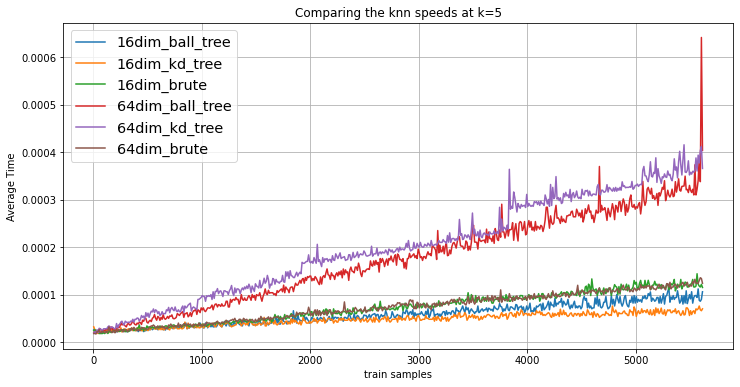

In [56]:
df_64.plot(ax=df_16.plot(),title='Comparing the knn speeds at k=5',figsize=(12,6),grid=True)
plt.ylabel('Average Time')
plt.xlabel('train samples')
plt.legend(loc='best',fontsize='x-large')
plt.show()

In [ ]:
结果结论分析
同样是64维：随着训练样本增加,三种算法用时排序从低到高依次为暴力搜索,球树,kd树
同样是16维: 随着训练样本增加,三种算法用时排序从低到高依次为kd树,球树,暴力搜索

说明高维情况下,搜索数据结构带来的开销使得整体预测用时增加.
而维度较低的时候，设计一个数据结构有助于运算的速度提升